<h2 align="center">Лабораторна робота №7</h2>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>
<p><b><i>Тема роботи:</i></b> "Застосування методів й алгоритмів у задачах машиного навчання".</p>
<p><b><i>Мета роботи:</i></b> опанувати принцип регуляризації при перенавчанні, вміти застосувати її на практиці, регуляризація L_1 (регресія Лассо), регуляризація L_2 (гребенева регресія), еластична сітка.</p>

### Завдання до лабораторної роботи

- Обрати один будь-який варіант з лінійними регресійними моделями. Взяти відповідні дані з файлу, який має назву **"TestRegData.xlsx"**.
- Програмно перемішати дані для створення тренувальної (начальної) та валідаційної (тестової) вибірок з метою здійснення машинного навчання на основі методів й алгоритмів ройового інтелекту. Взяти дослідження 75% вибірки для навчання та залишкові 25% для верифікації процесу навчання (як варіант - можна взяти 80% / 20%) так само, як у минулій роботі з дисципліни "Алгоритми і методи ройового інтелекту".
- Програмно реалізувати метод диференціальної еволюції та алгоритм оптимізації роєм частинок для знаходження невідомих параметрів обраної лінійоної регресійної моделі. Реалізувати $L_1$-регуляризацію і $L_2$-регуляризацію (аналітично і з використанням оптимізаціних методів), а також регуляризацію на основі еластичної сітки. Проаналізувати моделі з різними гіперпараметрами.
- Розглянути дані, які навдені у файлі **"boston_housing.xlsx"**, застосувати до нього усі результати з попередніх пунктів. Застосувати до даних з файлу регуляризацію $L_2$ на основі аналітичного виразу.
- Розглянути дані, які наведені у файлі **"boston_houding.xlsx"**, застосувати до нього усі результати з попередніх пунктів. Застосувати до даних з файлу регуляризацію $L_2$ методи й алгоритми ройового інтелекту. Порівнювати результати, вони мають бути ідентичними тим, які у попердньому пункті даних завдань.
- У розробленому програмному забезпеченні врахувати формування динаміки збіжності ітеративного процесу (на кожній ітерації) у вигляді графіків. Графіки представити після того, як програма закінчить свою роботу. Після виконання роботи програми представити графіки прогнозу на текстовій та навчальній вибірках. Модифікувати програму так, щоб грфіки оновлювати через кожні K ітерацій роботи методу / алгоритму.

## Імпорт

In [1]:
from sklearn.model_selection import train_test_split
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from SWRM import *

## Завантаження даних

In [2]:
# Завантаження даних з TestRegData.xlsx
data = pd.read_excel('TestRegData.xlsx', sheet_name='Var2')  # Замініть на свій варіант
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Ініціалізація функції втрати

In [ ]:
def loss_function(params, X, y, gamma1=0.01, gamma2=0.01, reg_type='l2'):
    w = params[1:]
    b = params[0]
    predictions = X.dot(w) + b
    mse = np.mean((predictions - y) ** 2)
    
    if reg_type == 'l2':
        reg = gamma1 * np.sum(w ** 2)
    elif reg_type == 'l1':
        reg = gamma2 * np.sum(np.abs(w))
    elif reg_type == 'elastic':
        reg = gamma1 * np.sum(w ** 2) + gamma2 * np.sum(np.abs(w))
    else:
        reg = 0
    
    return mse + reg


In [ ]:
# Навчання з L2-регуляризацією за допомогою PSO
pso_best_params_l2s, pso_best_loss_l2s = pso(lambda x: loss_function(x, X_train, y_train, reg_type="l2"), 
                                             np.array([[-10, 10]]*(X_train.shape[1] + 1)), 
                                             max_iter=100)

## Потрібно, щоб воно було жививм!

In [71]:
def animate_data(SWRM_f, t: str, name: str, 
                 X_train=X_train, y_train=y_train, 
                 X_test=X_test, y_test=y_test):

    params, loss = SWRM_f(lambda x: loss_function(x, X_train, y_train, reg_type=t), 
                          np.array([[-10, 10]]*(X_train.shape[1] + 1)))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    def update(frame):
        param = params[frame]
        ax[0].clear()
        ax[1].clear()
        
        w = param[1:]
        b = param[0]
        y_pred = X_test.dot(w) + b

        fig.suptitle(name)

        # Графік прогнозів vs реальних значень
        ax[0].scatter(y_test, y_pred, alpha=0.5)
        ax[0].set_xlabel('Реальні значення')
        ax[0].set_ylabel('Прогнозовані значення')
        ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
        ax[0].set_xlim(min(y_test), max(y_test))
        ax[0].set_ylim(min(y_test), max(y_test))
        ax[0].grid()

        ax[1].set_xlabel('Ітерації')
        ax[1].set_ylabel('MSE')
        ax[1].set_title(f'MSE: {np.round(np.mean((y_pred - y_test) ** 2), 4)}')
        ax[1].plot(np.arange(frame+1), loss[:frame+1])
        ax[1].grid()
        
        return ax

    # Створення анімації
    ani = FuncAnimation(
                        fig, 
                        update, 
                        frames=range(len(params)), 
                        interval=50
                        )

    ani.save(name+".gif", fps = 12)

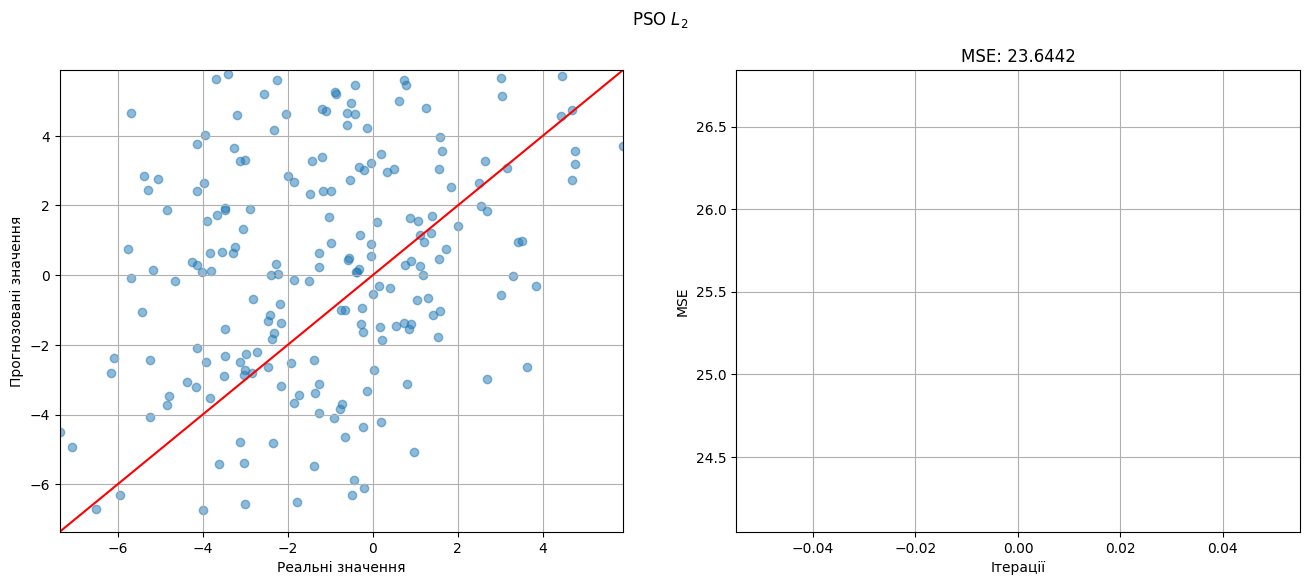

In [7]:
animate_data(pso, "l2", r"PSO $L_2$")

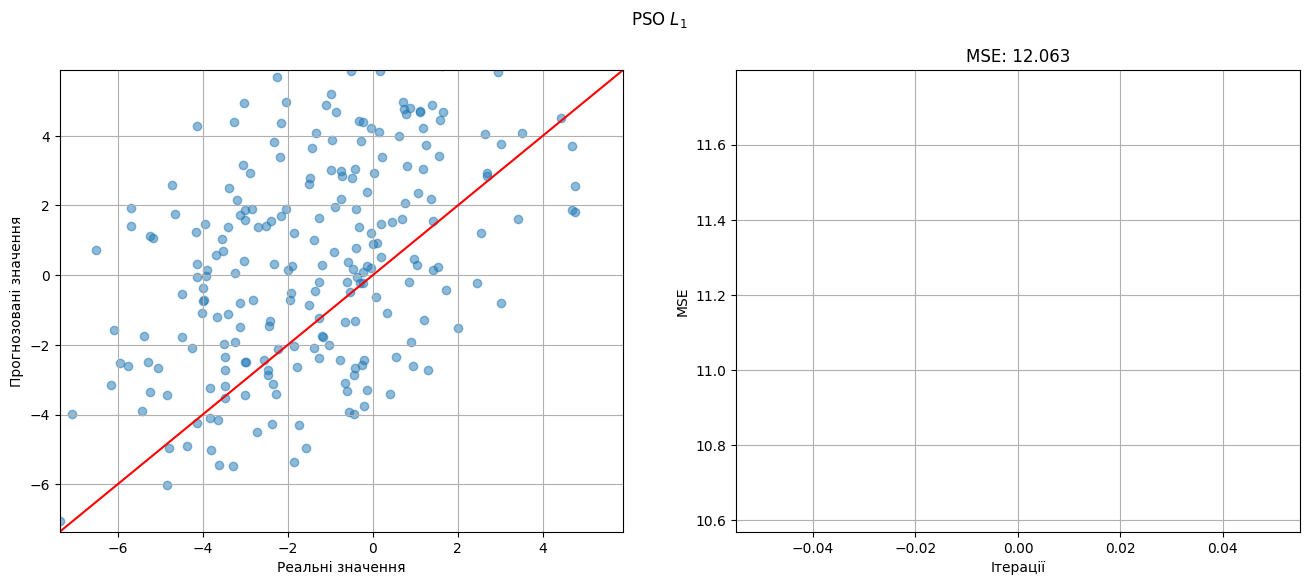

In [8]:
animate_data(pso, "l1", r"PSO $L_1$")

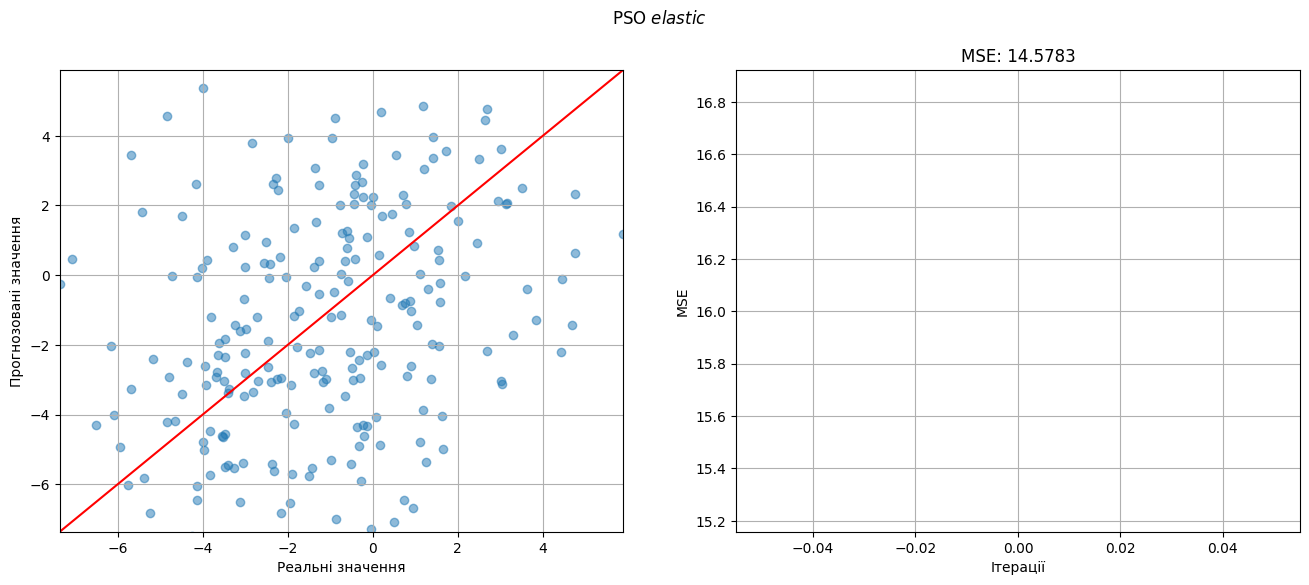

In [9]:
animate_data(pso, "elastic", r"PSO $elastic$")

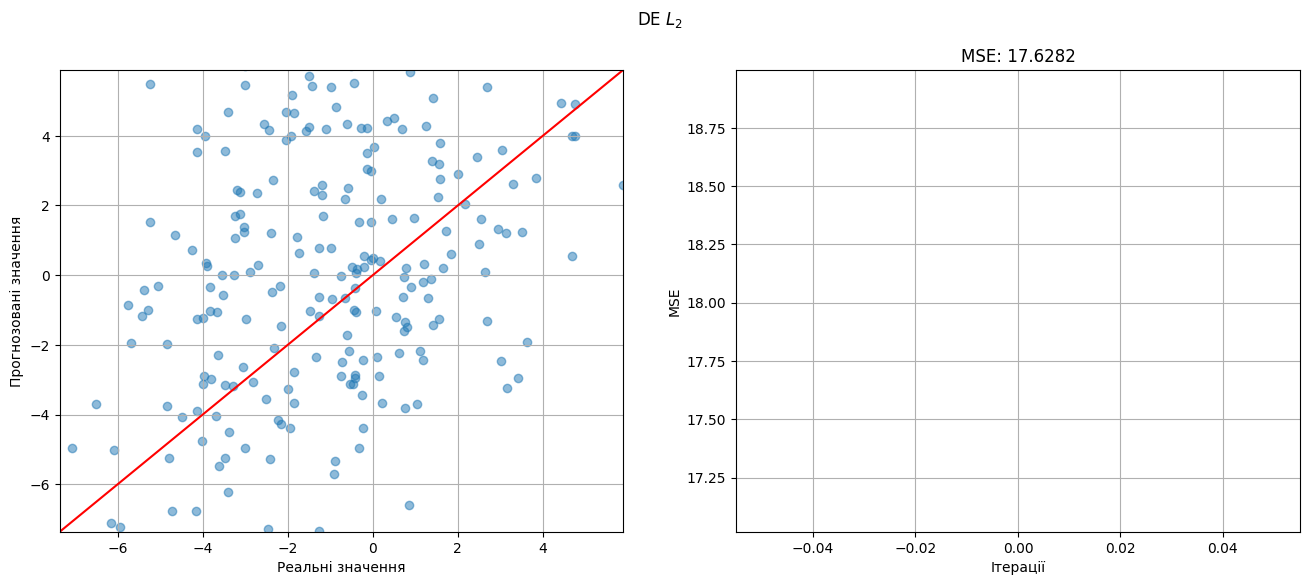

In [10]:
animate_data(de, "l2", r"DE $L_2$")

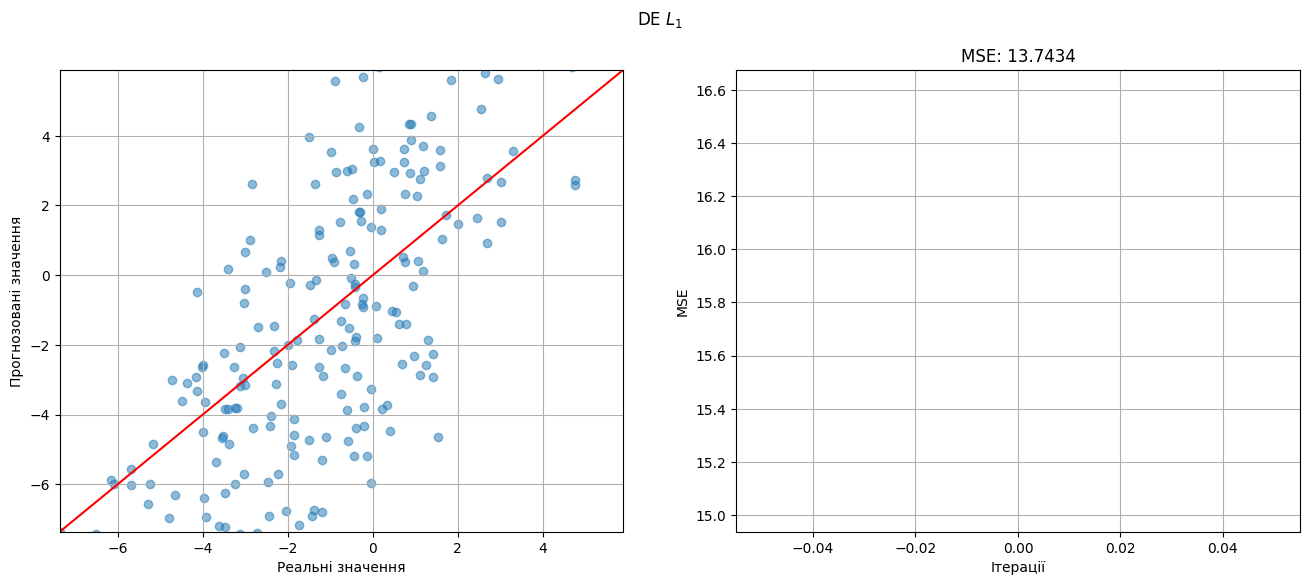

In [11]:
animate_data(de, "l1", r"DE $L_1$")

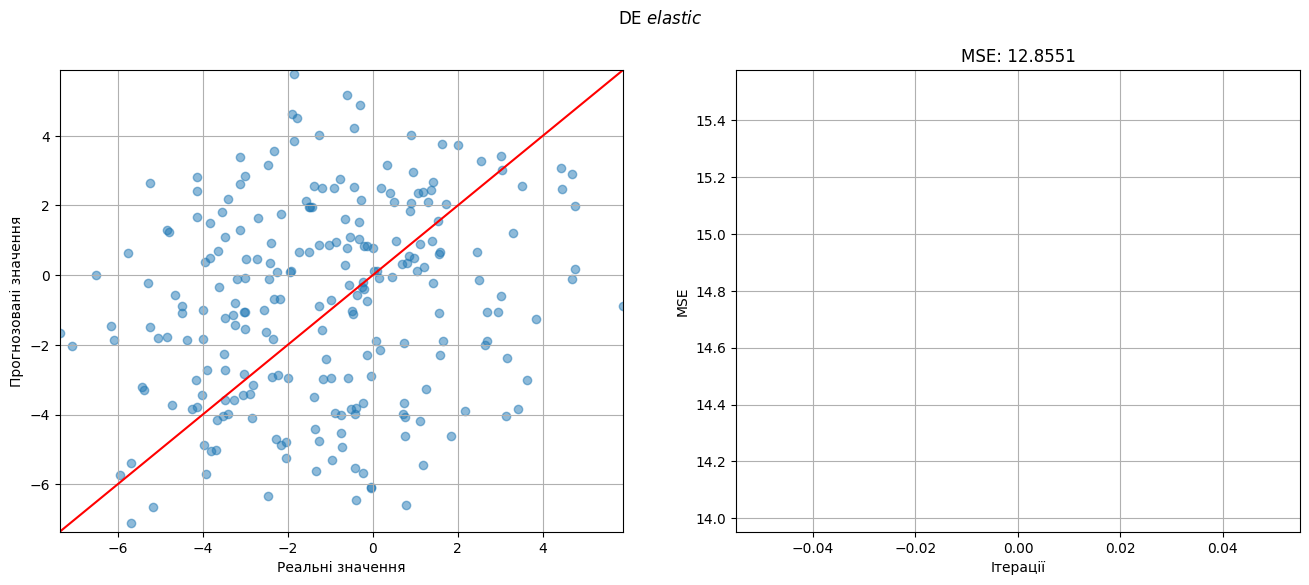

In [12]:
animate_data(de, "elastic", r"DE $elastic$")

## Ландшафт

In [19]:
gammas = np.arange(0, 1.1, 0.1)

pso_landshaft = []
de_landshaft = []

for i in range(len(gammas)):
    
    pso_landshaft.append([])
    de_landshaft.append([])
    
    for j in range(len(gammas)):
        
        pso_params, _ = pso(lambda x: loss_function(x, X_train, y_train, 
                                                    gammas[i], gammas[j], reg_type='elastic'), 
                            np.array([[-10, 10]]*(X_train.shape[1] + 1)))
        de_params, _ = de(lambda x: loss_function(x, X_train, y_train, 
                                                  gammas[i], gammas[j], reg_type='elastic'), 
                          np.array([[-10, 10]]*(X_train.shape[1] + 1)))

        pso_w = pso_params[-1][1:]
        pso_b = pso_params[-1][0]
        pso_y_pred = X_test.dot(pso_w) + pso_b
        
        de_w = de_params[-1][1:]
        de_b = de_params[-1][0]
        de_y_pred = X_test.dot(de_w) + de_b
        
        pso_landshaft[i].append(np.mean((pso_y_pred - y_test) ** 2))
        de_landshaft[i].append(np.mean((de_y_pred - y_test) ** 2))

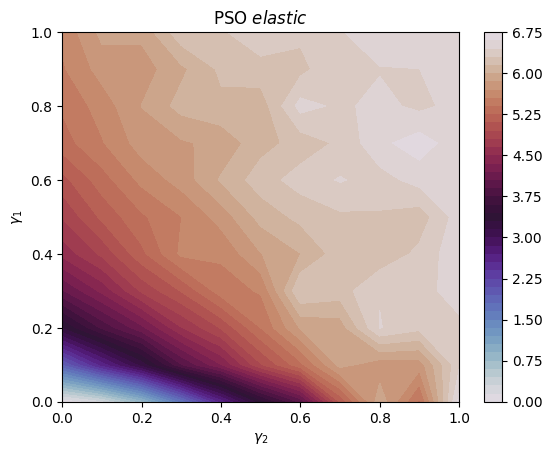

In [39]:
g1, g2 = np.meshgrid(gammas, gammas)

plt.contourf(g1, g2, pso_landshaft, 50, cmap="twilight")
plt.title(r"PSO $elastic$")
plt.ylabel(r"$\gamma_1$")
plt.xlabel(r"$\gamma_2$")
plt.colorbar()

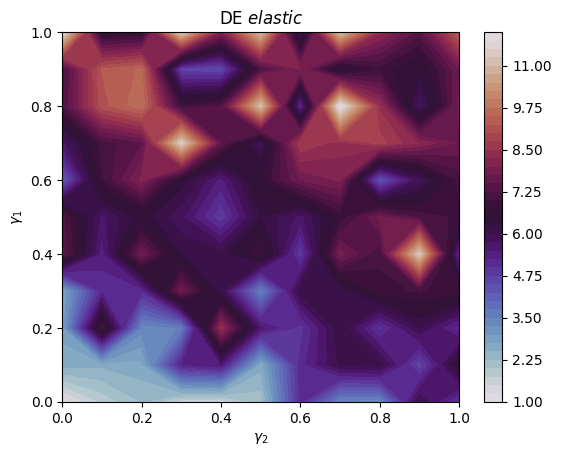

In [40]:
plt.contourf(g1, g2, de_landshaft, 50, cmap="twilight")
plt.title(r"DE $elastic$")
plt.ylabel(r"$\gamma_1$")
plt.xlabel(r"$\gamma_2$")
plt.colorbar()

## Boston?

In [ ]:
# Завантаження даних Boston Housing
boston = pd.read_excel('boston_housing.xlsx')
X_boston = boston.iloc[:, :-1].values
y_boston = boston.iloc[:, -1].values

In [43]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.25, random_state=42)

## Аналітичний розв'язок

MSE: 13.012477532769152


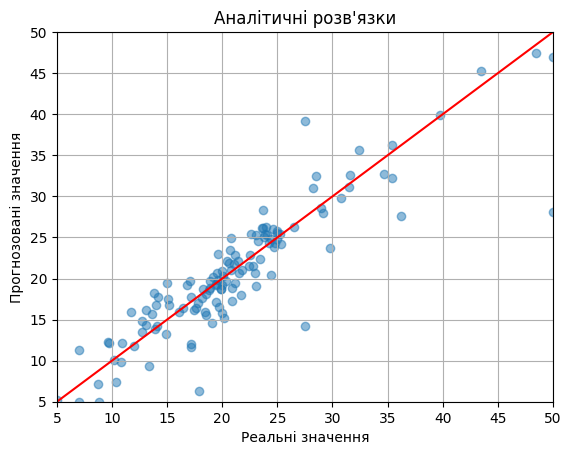

In [66]:
X_an = np.insert(X_train_boston, 0, np.ones(X_train_boston.shape[0]), axis=1)
a_an = np.linalg.inv(X_an.T.dot(X_an) + .01*np.eye(X_an.shape[1])).dot(X_an.T).dot(y_train_boston)

w_an = a_an[1:]
b_an = a_an[0]
y_pred_an = X_test_boston.dot(w_an) + b_an

print(f"MSE: {np.mean((y_pred_an - y_test_boston) ** 2)}")

plt.scatter(y_test_boston, y_pred_an, alpha=0.5)
plt.title("Аналітичні розв'язки")
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test_boston), max(y_test_boston)], 
         [min(y_test_boston), max(y_test_boston)], 
         color='red')
plt.xlim(min(y_test_boston), max(y_test_boston))
plt.ylim(min(y_test_boston), max(y_test_boston))
plt.grid()

## Використання багатьох розумних чортиків

In [67]:
params_boston, loss_boston = pso(lambda x: loss_function(x, X_train_boston, y_train_boston, 
                                                         .01, .01, reg_type='l2'), 
                                 np.array([[-10, 10]]*(X_train_boston.shape[1] + 1)))

MSE: 24.276933945717868


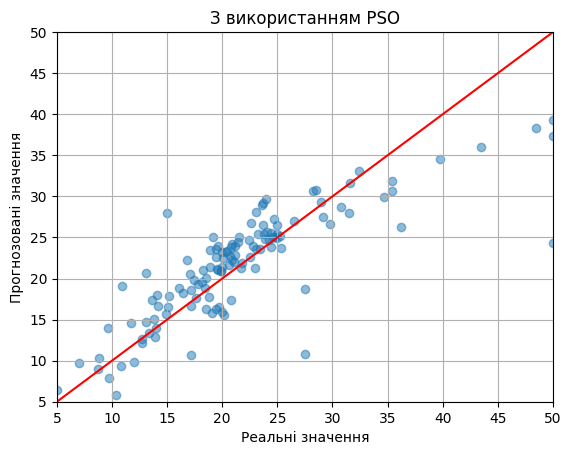

In [68]:
w_boston = params_boston[-1][1:]
b_boston = params_boston[-1][0]
y_pred_boston = X_test_boston.dot(w_boston) + b_boston

print(f"MSE: {np.mean((y_pred_boston - y_test_boston) ** 2)}")


plt.scatter(y_test_boston, y_pred_boston, alpha=0.5)
plt.title("З використанням PSO")
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test_boston), max(y_test_boston)], 
         [min(y_test_boston), max(y_test_boston)], 
         color='red')
plt.xlim(min(y_test_boston), max(y_test_boston))
plt.ylim(min(y_test_boston), max(y_test_boston))
plt.grid()

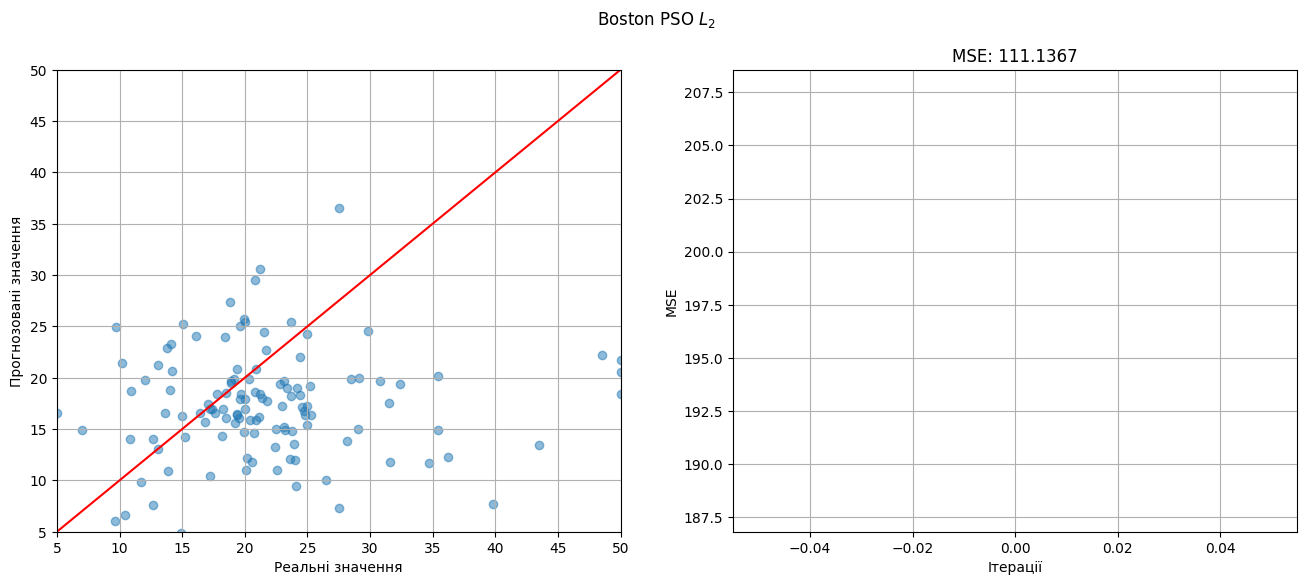

In [72]:
animate_data(pso, "l2", r"Boston PSO $L_2$", X_train_boston, y_train_boston, X_test_boston, y_test_boston)